In [1]:
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os

print(os.getpid())
%cd ../

13676
/media/work/docs/codes/c++/QSVT_framework/simulations


In [2]:
import pylib.measurement as mse
import pylib.mix as mix

In [3]:
nx = 10

gauss_rescaling = 0.98

In [29]:
# -----------------------------------------------------
# --- Calculate angles to encode sin(phi) ---
# -----------------------------------------------------

Nx = 1 << nx

# phi in [-1, 1]:
alpha_0 = -1.0
alpha = Nx * 1. / (Nx - 1.)

print("nqx \t{:d}".format(nx))
print("alpha_0 \t{:0.14e}".format(alpha_0))
print("alpha \t\t{:0.14e}".format(alpha))

nqx 	10
alpha_0 	-1.00000000000000e+00
alpha 		1.00097751710655e+00


In [16]:
# -------------------------------------------------------------
# --- TESTING SIN-GATE: Compare reference and resulting sin ---
# -------------------------------------------------------------

# --- reference grid ---
d_theta = 2.*alpha / Nx
theta = np.zeros(Nx)
for j in range(Nx):
    theta[j] = alpha_0 + j * d_theta
sin_grid_ref = np.sin(theta)

for j in range(Nx):   
    print("sin[{:d}] = \t{:0.3e}".format(j, sin_grid_ref[j]))

print()
coef_h = (1. / np.sqrt(2))**nx
for j in range(Nx):   
    print("coef_h*sin[{:d}] = \t{:0.3e}".format(j, coef_h * sin_grid_ref[j]))

sin[0] = 	-8.415e-01
sin[1] = 	-7.622e-01
sin[2] = 	-6.693e-01
sin[3] = 	-5.646e-01
sin[4] = 	-4.499e-01
sin[5] = 	-3.272e-01
sin[6] = 	-1.987e-01
sin[7] = 	-6.662e-02
sin[8] = 	6.662e-02
sin[9] = 	1.987e-01
sin[10] = 	3.272e-01
sin[11] = 	4.499e-01
sin[12] = 	5.646e-01
sin[13] = 	6.693e-01
sin[14] = 	7.622e-01
sin[15] = 	8.415e-01

coef_h*sin[0] = 	-2.104e-01
coef_h*sin[1] = 	-1.905e-01
coef_h*sin[2] = 	-1.673e-01
coef_h*sin[3] = 	-1.412e-01
coef_h*sin[4] = 	-1.125e-01
coef_h*sin[5] = 	-8.180e-02
coef_h*sin[6] = 	-4.967e-02
coef_h*sin[7] = 	-1.665e-02
coef_h*sin[8] = 	1.665e-02
coef_h*sin[9] = 	4.967e-02
coef_h*sin[10] = 	8.180e-02
coef_h*sin[11] = 	1.125e-01
coef_h*sin[12] = 	1.412e-01
coef_h*sin[13] = 	1.673e-01
coef_h*sin[14] = 	1.905e-01
coef_h*sin[15] = 	2.104e-01


In [8]:
# -------------------------------------------------------------
# --- Read Gauss ---
# -------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(mse)

pname_ = "Gauss"
path_case_ = "./tests/test_gauss"
print("Read the following project: {}".format(pname_))
print("Read from the following path: {}".format(path_case_))

oor = mse.MeasOracle__();
oor.pname_ = pname_
oor.path_  = path_case_
oor.open()
oor.read_qsvt()

oor.set_zero_ancillae_work_states(id_input_state = 0)

x_qc = 2*oor.get_x_grid("j") - 1.0
Gauss_qc = oor.get_var_x({}, "j")

nx_qc = oor.dd_["reg-nq"][-1]
print("nx: {:d}".format(nx_qc))

Read the following project: Gauss
Read from the following path: ./tests/test_gauss
Reading the file ./tests/test_gauss/Gauss_OUTPUT.hdf5...
Name of the simulation is Gauss
Simulation has been performed  09-01-2022 21:01:08
mu: 0.250
nx: 10


<IPython.core.display.Javascript object>


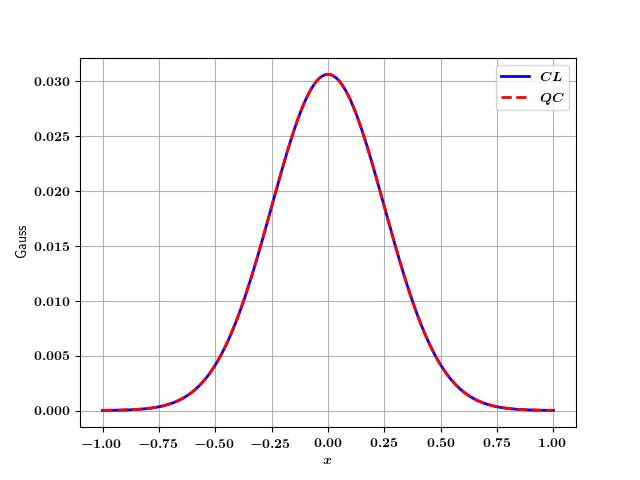

In [10]:
# ----------------------------------------------------------------------------------
# --- Plot results ---
# ----------------------------------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111)

coef_h = (1. / np.sqrt(2))**nx_qc 
F_gauss_asin  = lambda x, param, coef_norm: coef_h*coef_norm * np.exp(- x**2/(2*param**2)) 


ax.plot(
    x_qc, F_gauss_asin(x_qc, oor.dd_["qsvt"]["mu"], gauss_rescaling), 
    color='b',  
    linewidth = 2, linestyle='-', 
    label = "$CL$"
)
ax.plot(
    x_qc, -np.real(Gauss_qc), 
    color='r',  
    linewidth = 2, linestyle='--', 
    label = "$QC$"
)
plt.xlabel('$x$')
plt.ylabel("Gauss")
ax.legend()
plt.grid(True)
plt.show()

In [11]:
np.max(
    np.abs(F_gauss_asin(x_qc, oor.dd_["qsvt"]["mu"], gauss_rescaling) - np.abs(Gauss_qc))
)

2.8163402328567483e-13